In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

horse_dataset = pd.read_csv("datacarreras.csv")

horse_dataset

,fecha,numero_carrera,distancia_pista,grupo,nombre_caballo,tiempo,ult_div,penult_div,posicion,cuerpos_ult,cuerpos_penult,distancia_c,lote,jinete_act,jinete_gana,jinete_rep_mon,trainer_act,trainer_gana,resultado
0,08-11-2020,1,1800,2,ironhide,113.0,2100,2300,2,4.25,8.50,2,2,122,16,3,49,5,6
1,08-11-2020,1,1800,2,el ferretero,114.2,10000,10000,7,11.25,13.00,1,3,69,1,1,50,0,3
2,08-11-2020,1,1800,2,matheew star,115.0,350,350,5,6.50,4.25,2,3,43,5,3,93,8,4
3,08-11-2020,1,1800,2,power indy,113.3,450,600,3,6.50,5.50,3,3,99,14,1,146,19,1
4,08-11-2020,1,1800,2,gran giacomo,115.2,540,540,1,0.00,0.50,2,1,92,23,1,31,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,18-04-2021,13,1200,1,the queen shot,74.4,160,240,3,0.50,2.75,3,3,14,1,1,92,21,2
2148,18-04-2021,13,1200,1,happiness,76.2,8300,8300,5,8.50,8.50,3,3,115,16,1,21,3,7
2149,18-04-2021,13,1200,1,do elsy,77.0,10000,600,5,8.50,14.00,1,3,34,5,3,193,28,9
2150,18-04-2021,13,1200,1,black truffle,76.0,800,800,2,4.25,11.25,3,3,28,1,3,28,4,3


In [2]:
# Wins/Starts
horse_dataset['effect_jinete'] = round(horse_dataset["jinete_gana"] / horse_dataset["jinete_act"] * 100, 2)
horse_dataset['effect_trainer'] = round(horse_dataset["trainer_gana"] / horse_dataset["trainer_act"] * 100, 2)

#Filtering and replacing values

#horse_dataset['mej_div'] = horse_dataset['penult_div'] - horse_dataset['ult_div']
horse_dataset = horse_dataset.replace(np.inf, 30)
horse_dataset = horse_dataset[horse_dataset.resultado != 0]
#horse_dataset = horse_dataset[horse_dataset.cuerpos_ult <= 25]
horse_dataset["jinete_rep_mon"].replace(1, 0)
horse_dataset["jinete_rep_mon"].replace(3, 1)
#horse_dataset["cuerpos_ult"].replace(0, horse_dataset["cuerpos_ult"].mean(axis=0), inplace=True)
horse_dataset["distancia_pista"].value_counts()

1200    443
1300    273
1400    244
1100    203
1600     41
1500     33
1800     19
1900     12
2400     12
Name: distancia_pista, dtype: int64

In [3]:
horse_dataset = horse_dataset[['distancia_pista', 'tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer', 'resultado']]
horse_dataset["ult_div"].replace(0, horse_dataset["ult_div"].mean(axis=0), inplace=True)
horse_dataset

,distancia_pista,tiempo,ult_div,posicion,cuerpos_ult,distancia_c,lote,jinete_gana,effect_jinete,jinete_rep_mon,trainer_gana,effect_trainer,resultado
0,1800,113.0,2100.0,2,4.25,2,2,16,13.11,3,5,10.20,6
1,1800,114.2,10000.0,7,11.25,1,3,1,1.45,1,0,0.00,3
2,1800,115.0,350.0,5,6.50,2,3,5,11.63,3,8,8.60,4
3,1800,113.3,450.0,3,6.50,3,3,14,14.14,1,19,13.01,1
4,1800,115.2,540.0,1,0.00,2,1,23,25.00,1,6,19.35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,1300,83.2,2600.0,12,19.75,2,3,0,0.00,1,1,3.57,10
1349,1300,82.3,3600.0,6,6.75,3,2,22,13.66,1,0,0.00,7
1350,1300,82.4,6000.0,6,7.00,2,3,2,5.56,1,1,5.56,4
1351,1300,82.3,10000.0,7,8.00,2,3,0,0.00,1,14,12.50,3


In [ ]:
for i in horse_dataset['resultado']:
    if i > 6:
        horse_dataset['resultado'].replace(i, 6, inplace=True)
        
horse_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<AxesSubplot:>

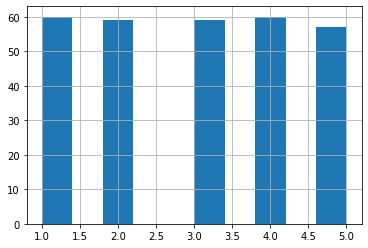

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

carreras_1200 = horse_dataset.loc[horse_dataset['distancia_pista'] <= 1200]
carreras_1200_gana = carreras_1200.loc[horse_dataset['resultado'] <= 5]
carreras_1300_plus = horse_dataset.loc[horse_dataset['distancia_pista'] >=1300]
carreras_1300_plus_gana = carreras_1300_plus.loc[horse_dataset['resultado'] <= 5]
#horse_dataset = horse_dataset.loc[horse_dataset["resultado"] <= 10]

carreras_1200_gana["resultado_cat"] = pd.cut(carreras_1200_gana["resultado"], bins=[0., 1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])
carreras_1300_plus_gana["resultado_cat"] = pd.cut(carreras_1300_plus_gana["resultado"], bins=[0., 1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])

#carreras_1200_train, carreras_1200_test = train_test_split(carreras_1200_gana, test_size = 0.1, random_state=42)
#carreras_1300_train, carreras_1300_test = train_test_split(carreras_1300_plus_gana, test_size = 0.1, random_state=42)
#horse_dataset_train, horse_dataset_test = train_test_split(horse_dataset, test_size = 0.1, random_state=42)

carreras_1300_plus_gana["resultado_cat"].hist()

In [5]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in split.split(carreras_1200_gana, carreras_1200_gana["resultado_cat"]):
    carreras_1200_train_strat = carreras_1200_gana.iloc[train_index]
    carreras_1200_test_strat = carreras_1200_gana.iloc[test_index]
    
for train_index, test_index in split.split(carreras_1300_plus_gana, carreras_1300_plus_gana["resultado_cat"]):
    carreras_1300_train_strat = carreras_1300_plus_gana.iloc[train_index]
    carreras_1300_test_strat = carreras_1300_plus_gana.iloc[test_index]

In [6]:
carreras_1300_test_strat["resultado_cat"].value_counts() / len(carreras_1300_test_strat)

5    0.2
4    0.2
3    0.2
2    0.2
1    0.2
Name: resultado_cat, dtype: float64

In [7]:
for set_ in (carreras_1200_train_strat, carreras_1200_test_strat):
    set_.drop("resultado_cat", axis=1, inplace=True)
    
for set_ in (carreras_1300_train_strat, carreras_1300_test_strat):
    set_.drop("resultado_cat", axis=1, inplace=True)

/home/Nj1991/.local/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


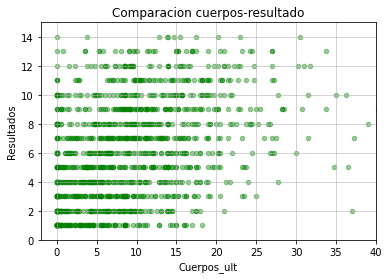

In [8]:
%matplotlib inline
plt.scatter(horse_dataset["cuerpos_ult"],horse_dataset["resultado"], alpha=0.4, c="green", s=20)
plt.title("Comparacion cuerpos-resultado")
plt.xlabel("Cuerpos_ult")
plt.ylabel("Resultados")
plt.ylim(0,15)
plt.xlim(-2, 40)
plt.grid(alpha=0.7)

In [9]:
horse_corr_matrix_1300_plus = carreras_1300_plus_gana.corr()
horse_corr_matrix_1300_plus['resultado'].sort_values(ascending=True)

jinete_gana       -0.148244
effect_jinete     -0.130815
effect_trainer    -0.116217
trainer_gana      -0.087582
distancia_c       -0.070466
lote              -0.055280
distancia_pista    0.003763
jinete_rep_mon     0.016622
tiempo             0.029818
ult_div            0.209363
cuerpos_ult        0.212176
posicion           0.234942
resultado          1.000000
Name: resultado, dtype: float64

In [10]:
horse_corr_matrix_1200 = carreras_1200_gana.corr()
horse_corr_matrix_1200['resultado'].sort_values(ascending=True)

effect_jinete     -0.150652
distancia_c       -0.139777
jinete_rep_mon    -0.077193
trainer_gana      -0.064482
effect_trainer    -0.035140
jinete_gana       -0.033050
distancia_pista   -0.031332
lote              -0.000439
tiempo             0.037428
ult_div            0.211907
cuerpos_ult        0.233131
posicion           0.245899
resultado          1.000000
Name: resultado, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attribs = ['resultado', 'tiempo', 'lote', 'cuerpos_ult', "distancia_c"]
scatter_matrix(horse_dataset[attribs], figsize=(12,8))

In [11]:
#horse_dataset_r = horse_dataset_train["resultado"].copy()
carreras_1200_r = carreras_1200_train_strat["resultado"].copy()
carreras_1300_plus_r = carreras_1300_train_strat["resultado"].copy()

#horse_dataset_train.drop("resultado", axis=1)
carreras_1200_train_strat.drop("resultado", axis=1)
carreras_1300_train_strat.drop("resultado", axis=1)

,distancia_pista,tiempo,ult_div,posicion,cuerpos_ult,distancia_c,lote,jinete_gana,effect_jinete,jinete_rep_mon,trainer_gana,effect_trainer
1088,1300,80.4,700.0,3,3.50,3,3,20,13.70,3,2,16.67
530,1300,81.4,450.0,4,8.25,3,3,3,9.38,1,13,18.06
470,1300,82.1,1000.0,2,3.00,3,3,5,7.25,3,5,7.25
494,1400,87.1,300.0,2,0.50,3,3,19,14.18,1,17,14.78
966,1300,79.2,300.0,2,0.10,3,4,18,14.40,1,18,13.85
...,...,...,...,...,...,...,...,...,...,...,...,...
2,1800,115.0,350.0,5,6.50,2,3,5,11.63,3,8,8.60
1068,1300,78.3,550.0,2,0.50,3,3,14,17.07,1,25,18.52
1112,1300,81.1,900.0,2,4.75,3,3,0,0.00,1,8,17.02
527,1300,82.4,1200.0,10,14.00,2,3,8,12.12,3,24,13.95


In [12]:
#horse_dataset_prepared = horse_dataset_train[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
carreras_1200_prepared = carreras_1200_train_strat[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
carreras_1300_prepared = carreras_1300_train_strat[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]

In [17]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score

X_1200, y_1200 = carreras_1200_prepared, carreras_1200_r
X_1300, y_1300 = carreras_1300_prepared, carreras_1300_plus_r
#X_total, y_total = horse_dataset_prepared, horse_dataset_r

transform_data = Pipeline([
    ("scaler", StandardScaler())
])

#Linear Support Vector Classifier 
svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("svm_clf_short", LinearSVC(C=50, loss="hinge", max_iter=20000, dual=True))
])

#Support Vector Machine Classifier with polynomial kernel
svm_clf_pk = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf_long", SVC(kernel="poly", degree=7, coef0=5, C=20, probability=True))
])

#Paramaters for grid search SVM_PK (SVM_PK best parameters: {'C': 20, 'coef0': 5, 'degree': 7, 'kernel': 'poly'})
param_grid_svm_pk = [
    {'kernel':['poly'],'degree': [7, 10, 14], 'coef0': [5, 10], "C": [20, 50, 100]}
]

grid_search_svm_pk = GridSearchCV(SVC(), param_grid_svm_pk, cv=3, return_train_score=True, scoring="accuracy")

#Support Vector Machine Classifier with Gaussian RBF kernel
svm_clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf_gauss", SVC(kernel="rbf", gamma=6, C=10))
])

#Support Vector Machine Classifier RBF grid search
param_grid_svm_rbf = [
    {'kernel':['rbf'],'gamma': [2, 4, 6, 10], "C": [0.1, 5, 10, 50, 100]}
]


grid_search_svm_rbf = GridSearchCV(SVC(), param_grid_svm_rbf, cv=3, return_train_score=True, scoring="accuracy")

#Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=800, bootstrap=False, max_depth=6, max_features="sqrt", max_leaf_nodes=20)

# Extra-trees Classifier
et_clf = ExtraTreesClassifier(n_estimators=800, bootstrap=False, max_depth=8, max_features="sqrt", max_leaf_nodes=20)


#RandomForest Grid search
param_grid_rf = [
    {'n_estimators': [500, 800, 1000, 2000], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [5, 10, 15]}
]

grid_search_rf = GridSearchCV(RandomForestClassifier(bootstrap=False), param_grid_rf, cv=3, return_train_score=True, scoring="accuracy")

#Softmax Regression Classifier
softmax_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("softmax_r", LogisticRegression(multi_class="multinomial", solver="lbfgs", C=0.001, max_iter=20000))
])

#Softmax Grid search {'C': 0.5, 'max_iter': 20000, 'multi_class': 'multinomial', 'solver': 'saga'}
param_grid_softmax = [
    {'multi_class':['multinomial'], 'C': [0.001, 0.1, 0.5], 'solver': ['lbfgs', 'saga', 'newton-cg'], 'max_iter': [20000, 40000, 80000]}
]

grid_search_softmax = GridSearchCV(LogisticRegression(), param_grid_softmax, cv=3, return_train_score=True, scoring="accuracy")

# AdaBoost Classifier for svm with pk
ada_clf = Pipeline([    
    ("scaler", StandardScaler()),
    ("svm_clf_long", AdaBoostClassifier(SVC(kernel="poly", degree=7, coef0=5, C=10, probability=True), n_estimators=100, algorithm='SAMME.R', learning_rate=0.5))
])

# Stacking Ensemble with Random Forest, SVM, and Softmax regression
stimators = [
    ('ada_svm', make_pipeline(StandardScaler(), AdaBoostClassifier(SVC(kernel="poly", degree=7, coef0=5, C=10, probability=True),
                                                                   n_estimators=100, algorithm='SAMME.R', learning_rate=0.5))),
    
    ('softmax', make_pipeline(StandardScaler(), LogisticRegression(multi_class="multinomial", 
                                                                   solver="lbfgs", C=0.001, max_iter=20000)))
]

stk_clf = StackingClassifier(estimators=stimators, 
                             final_estimator=RandomForestClassifier(n_estimators=800, bootstrap=False, max_depth=6, 
                                                                    max_features="sqrt", max_leaf_nodes=20))

#Adaboost Random forest
ada_b_tree = AdaBoostClassifier(RandomForestClassifier(n_estimators=700, bootstrap=False, 
                                                       max_depth=6, max_features="sqrt", max_leaf_nodes=20), n_estimators=10, algorithm="SAMME.R", learning_rate=0.5)

#Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('softmax', softmax_reg), ('rf',rf_clf), ('ada_rf',ada_b_tree)], voting="soft")

In [ ]:
#grid_X_1300 = transform_data.fit_transform(X_1300)
#grid_search_svm_pk.fit(grid_X_1300, y_1300)

In [ ]:
#grid_search_rf.fit(grid_X_1300, y_1300)

In [ ]:
grid_X_1300 = transform_data.fit_transform(X_1300)
grid_search_softmax.fit(grid_X_1300, y_1300)

In [ ]:
#print("SVM_PK best parameters: " + str(grid_search_svm_pk.best_params_))
#print(f"RandomForest best parameters: {grid_search_rf.best_params_}"
print("Softmax best parameters: " + str(grid_search_softmax.best_params_))

In [14]:
y_test_1200 = carreras_1200_test_strat["resultado"].copy()
y_test_1300 = carreras_1300_test_strat["resultado"].copy()
#y_test_total = horse_dataset_test["resultado"].copy()

X_test_1200 = carreras_1200_test_strat[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
X_test_1300 = carreras_1300_test_strat[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
#X_test_total = horse_dataset_test[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]

X_test_1200_prepared = transform_data.fit_transform(X_test_1200)
X_test_1300_prepared = transform_data.fit_transform(X_test_1300)
#X_test_total_prepared = transform_data.fit_transform(X_test_total)

In [ ]:
svm_clf_pk.fit(X_1300, y_1300)

In [ ]:
from sklearn.model_selection import cross_val_score

y_pred_svm = cross_val_score(svm_clf_pk, X_1300, y_1300, scoring="accuracy", cv=6)

y_pred_1300 = svm_clf_pk.predict(X_test_1300)

svm_clf_pk_matthew = matthews_corrcoef(y_test_1300, y_pred_1300)

def display_scores(scores, matthew):
    print("Accuracy: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    print(f"Matthew's coef: {matthew}")
    
display_scores(y_pred_svm, svm_clf_pk_matthew)

In [18]:
some_data = X_test_1300.iloc[:10]
some_labels = y_test_1300.iloc[:10]

In [ ]:
print(f"Percentages: {svm_clf_pk.predict_proba(some_data)}")
print(f"Predictions: {svm_clf_pk.predict(some_data)}")
print(f"Labels: {list(some_labels)}")

y_pred, y_true = svm_clf_pk.predict(some_data), some_labels

print(f"Matthew coef: {matthews_corrcoef(y_true, y_pred)}")

In [ ]:
rf_clf.fit(X_1300, y_1300)

In [ ]:
rf_clf.feature_importances_

In [ ]:
y_pred_rf = cross_val_score(rf_clf, X_1300, y_1300, scoring="accuracy", cv=6)

y_pred_1300 = rf_clf.predict(X_test_1300)

rf_clf_matthew = matthews_corrcoef(y_test_1300, y_pred_1300)

display_scores(y_pred_rf, rf_clf_matthew)

In [ ]:
print(f"Percentages: {rf_clf.predict_proba(some_data)}")
print(f"Predictions: {rf_clf.predict(some_data)}")
print(f"Labels: {list(some_labels)}")

In [ ]:
softmax_reg.fit(X_1300, y_1300)

y_pred_softmax = cross_val_score(softmax_reg, X_1300, y_1300, scoring="accuracy", cv=5)

y_pred_1300 = softmax_reg.predict(X_test_1300)

softmax_clf_matthew = matthews_corrcoef(y_test_1300, y_pred_1300)

display_scores(y_pred_softmax, softmax_clf_matthew)

In [ ]:
print(f"Percentages: {softmax_reg.predict_proba(some_data)}")
print(f"Predictions: {softmax_reg.predict(some_data)}")
print(f"Labels: {list(some_labels)}")

In [19]:
from sklearn.metrics import accuracy_score

print("Accuracy Scores:")
for clf in (svm_clf_pk, rf_clf, ada_clf, ada_b_tree, softmax_reg, voting_clf):
    clf.fit(X_1300, y_1300)
    y_pred = clf.predict(X_test_1300)
    print(clf.__class__.__name__, accuracy_score(y_test_1300, y_pred))
    
print("\nMatthew's coef:")
for clf in (svm_clf_pk, rf_clf, ada_clf, ada_b_tree,softmax_reg, voting_clf):
    clf.fit(X_1300, y_1300)
    y_pred = clf.predict(X_test_1300)
    print(clf.__class__.__name__, matthews_corrcoef(y_test_1300, y_pred))
    
print("\nPredictions for some data:")
for clf in (svm_clf_pk, rf_clf, ada_clf, ada_b_tree,softmax_reg, voting_clf):
    clf.fit(X_1300, y_1300)
    print(clf.__class__.__name__)
    print(f"Predictions: {clf.predict(some_data)}")
    print(f"Labels: {list(some_labels)}")
    print("\n")

Accuracy Scores:
Pipeline 0.2
RandomForestClassifier 0.26666666666666666
Pipeline 0.16666666666666666
AdaBoostClassifier 0.4
Pipeline 0.3333333333333333
VotingClassifier 0.3

Matthew's coef:
Pipeline 0.0
RandomForestClassifier 0.08512565307587486
Pipeline 0.04319342127906801
AdaBoostClassifier 0.2553769592276246
Pipeline 0.18864566947613626
VotingClassifier 0.12659242088545833

Predictions for some data:
Pipeline
Predictions: [2 1 4 3 3 4 2 1 2 5]
Labels: [4, 4, 4, 2, 5, 1, 3, 3, 5, 3]


RandomForestClassifier
Predictions: [1 1 3 4 3 4 4 3 3 3]
Labels: [4, 4, 4, 2, 5, 1, 3, 3, 5, 3]


Pipeline
Predictions: [4 1 3 1 4 2 3 4 4 4]
Labels: [4, 4, 4, 2, 5, 1, 3, 3, 5, 3]


AdaBoostClassifier
Predictions: [1 1 3 4 3 4 4 3 2 3]
Labels: [4, 4, 4, 2, 5, 1, 3, 3, 5, 3]


Pipeline
Predictions: [1 1 4 4 4 1 4 1 4 3]
Labels: [4, 4, 4, 2, 5, 1, 3, 3, 5, 3]


VotingClassifier
Predictions: [1 1 3 4 3 4 4 3 3 3]
Labels: [4, 4, 4, 2, 5, 1, 3, 3, 5, 3]




In [ ]:
#Random Forest with 50% accuracy and 0.3 matthew coef(TESTING and TRAINED ON AN OLDER DATASET)

import joblib

joblib.dump(rf_clf, './RFCHorses.pkl')

#To load it
#clf = joblib.load('RFCHorses.pkl')